In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Trabalho Final - IA/2019_censo_curso_apoiotecnico_20230507.csv', encoding='cp1252', sep=';')

<ipython-input-313-f8c744953100>:1: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Trabalho Final - IA/2019_censo_curso_apoiotecnico_20230507.csv', encoding='cp1252', sep=';')


In [ ]:
# Função para converter uma string para PascalCase
def to_pascal_case(s):
    s = s.title().replace("_", "")
    return s

In [ ]:
# Convertendo os nomes das colunas para PascalCase
data.columns = [to_pascal_case(col) for col in data.columns]
# data1 = data1.drop(data1.columns[0], axis=1)


In [ ]:
# Obter e imprimir os nomes das colunas
colunas = data.columns.tolist()
print(colunas)

['NuAnoCenso', 'CoIes', 'NoIes', 'SgIes', 'TpCategoriaAdministrativa', 'NoCategoriaAdministrativa', 'TpOrganizacaoAcademica', 'NoOrganizacaoAcademica', 'CoLocalOferta', 'NoLocalOferta', 'CoUfCurso', 'NoUfCurso', 'SiglaUfCurso', 'NoRegiaoCurso', 'CoMunicCurso', 'NoMunicCurso', 'InCapitalCurso', 'CoCurso', 'NoCurso', 'TpSituacao', 'NoSituacao', 'CoCineRotulo', 'TpGrauAcademico', 'NoGrauAcademico', 'TpModalidadeEnsino', 'NoModalidadeEnsino', 'TpNivelAcademico', 'NoNivelAcademico', 'InGratuito', 'TpAtributoIngresso', 'NoAtributoIngresso', 'NuCargaHoraria', 'DtInicioFuncionamento', 'DtAutorizacaoCurso', 'InAjudaDeficiente', 'InMaterialDigital', 'InMaterialAmpliado', 'InMaterialTatil', 'InMaterialImpresso', 'InMaterialAudio', 'InMaterialBraille', 'InMaterialLibras', 'InDisciplinaLibras', 'InTradutorLibras', 'InGuiaInterprete', 'InRecursosComunicacao', 'InRecursosInformatica', 'InIntegral', 'InMatutino', 'InVespertino', 'InNoturno', 'NuIntegralizacaoIntegral', 'NuIntegralizacaoMatutino', 'NuI

In [ ]:
# Adicionando as duas colunas a serem inclusas na lista de colunas a manter
colunas_a_manter = [
                'CoIes', 'TpCategoriaAdministrativa', 'NoCategoriaAdministrativa', 'TpOrganizacaoAcademica',
                'NoOrganizacaoAcademica', 'CoUfCurso', 'NoUfCurso', 'InCapitalCurso', 'CoCurso', 'NoCurso',
                'TpSituacao', 'NoSituacao', 'TpGrauAcademico', 'NoGrauAcademico', 'TpModalidadeEnsino',
                'NoModalidadeEnsino', 'TpNivelAcademico', 'NoNivelAcademico', 'InGratuito', 'NuCargaHoraria',
                'InAjudaDeficiente', 'InMaterialDigital', 'InMaterialAmpliado', 'InMaterialTatil',
                'InMaterialImpresso', 'InMaterialAudio', 'InMaterialBraille', 'InMaterialLibras',
                'InDisciplinaLibras', 'InTradutorLibras', 'InGuiaInterprete', 'InRecursosComunicacao',
                'InRecursosInformatica', 'QtIngressoTotal', 'QtConcluinteTotal', 'QtIngressoVagaNova',
                'QtVagaTotal', 'NuAnoCenso', 'SgIes', 'NoRegiaoCurso',
]

In [ ]:
# Filtrar o DataFrame para manter apenas as colunas desejadas
data_filtrada = data[colunas_a_manter]

In [ ]:
# Crie uma cópia profunda do DataFrame para evitar o SettingWithCopyWarning
data_filtrada = data[colunas_a_manter].copy()

# Calcula a média de ingressantes desconsiderando os zeros
media_ingressantes = data_filtrada[data_filtrada['QtIngressoTotal'] > 0]['QtIngressoTotal'].mean()


In [ ]:
# Define os bins e labels
bins_proporcao = [0, 0.5, 0.9, 1.1, 1.5, float("inf")]
labels_proporcao = ['Proporção Ingressantes-Concluintes muito abaixo da proporção', 'Proporção Ingressantes-Concluintes abaixo da proporção', 'Proporção Ingressantes-Concluintes perto da proporção', 'Proporção Ingressantes-Concluintes acima da proporção', 'Proporção Ingressantes-Concluintes muito acima da proporção']
bins_ingressantes = [0, media_ingressantes * 0.5, media_ingressantes * 0.9, media_ingressantes * 1.1, media_ingressantes * 1.5, float("inf")]
labels_ingressantes = ['Quantidade ingressantes muito abaixo da média', 'Quantidade ingressantes abaixo da média', 'Quantidade ingressantes perto da média', 'Quantidade ingressantes acima da média', 'Quantidade ingressantes muito acima da média']

In [ ]:
# Função para categorizar
def categorizar(valor, bins, labels):
    if valor == 0:
        return 'não disponível'
    else:
        return pd.cut([valor], bins=bins, labels=labels)[0]


In [ ]:
# Categoriza os concluintes de forma proporcional aos ingressantes
data_filtrada['ProporcaoConcluintesIngressantes'] = data_filtrada['QtConcluinteTotal'] / data_filtrada['QtIngressoTotal']
data_filtrada['CategoriaProporcaoConcluintes'] = data_filtrada['ProporcaoConcluintesIngressantes'].apply(lambda x: categorizar(x, bins_proporcao, labels_proporcao))


In [ ]:
# Categoriza os ingressantes
data_filtrada['CategoriaIngressantes'] = data_filtrada['QtIngressoTotal'].apply(lambda x: categorizar(x, bins_ingressantes, labels_ingressantes))

In [ ]:
data_filtrada.head(50)

,CoIes,TpCategoriaAdministrativa,NoCategoriaAdministrativa,TpOrganizacaoAcademica,NoOrganizacaoAcademica,CoUfCurso,NoUfCurso,InCapitalCurso,CoCurso,NoCurso,...,QtIngressoTotal,QtConcluinteTotal,QtIngressoVagaNova,QtVagaTotal,NuAnoCenso,SgIes,NoRegiaoCurso,ProporcaoConcluintesIngressantes,CategoriaProporcaoConcluintes,CategoriaIngressantes
0,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,22113,ADMINISTRAÇÃO,...,15,23,15,100,2019,IESUR,Norte,1.533333,Proporção Ingressantes-Concluintes muito acima...,Quantidade ingressantes muito abaixo da média
1,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,54688,DIREITO,...,84,80,83,105,2019,IESUR,Norte,0.952381,Proporção Ingressantes-Concluintes perto da pr...,Quantidade ingressantes abaixo da média
2,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,96110,PSICOLOGIA,...,2,23,2,100,2019,IESUR,Norte,11.500000,Proporção Ingressantes-Concluintes muito acima...,Quantidade ingressantes muito abaixo da média
3,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,1279568,CIÊNCIAS CONTÁBEIS,...,21,10,21,100,2019,IESUR,Norte,0.476190,Proporção Ingressantes-Concluintes muito abaix...,Quantidade ingressantes muito abaixo da média
4,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,5000263,FARMÁCIA,...,36,30,36,50,2019,IESUR,Norte,0.833333,Proporção Ingressantes-Concluintes abaixo da p...,Quantidade ingressantes muito abaixo da média
5,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,5000264,ENFERMAGEM,...,44,16,44,50,2019,IESUR,Norte,0.363636,Proporção Ingressantes-Concluintes muito abaix...,Quantidade ingressantes muito abaixo da média
6,4613,4,Privada com fins lucrativos,3,Faculdade,11,Rondônia,0,104306,ENFERMAGEM,...,50,59,50,228,2019,FAEMA,Norte,1.180000,Proporção Ingressantes-Concluintes acima da pr...,Quantidade ingressantes muito abaixo da média
7,4613,4,Privada com fins lucrativos,3,Faculdade,11,Rondônia,0,104308,FARMÁCIA,...,27,53,26,340,2019,FAEMA,Norte,1.962963,Proporção Ingressantes-Concluintes muito acima...,Quantidade ingressantes muito abaixo da média
8,4613,4,Privada com fins lucrativos,3,Faculdade,11,Rondônia,0,104312,FISIOTERAPIA,...,36,26,36,389,2019,FAEMA,Norte,0.722222,Proporção Ingressantes-Concluintes abaixo da p...,Quantidade ingressantes muito abaixo da média
9,4613,4,Privada com fins lucrativos,3,Faculdade,11,Rondônia,0,117508,PSICOLOGIA,...,33,17,32,426,2019,FAEMA,Norte,0.515152,Proporção Ingressantes-Concluintes abaixo da p...,Quantidade ingressantes muito abaixo da média


In [ ]:
def replace_boolean_values_in_all_columns(dataframe):
    count_replaced = 0
    for column in dataframe.columns:
        # Verificar se todos os valores são 0 ou 1
        unique_values = dataframe[column].unique()
        is_boolean = set(unique_values).issubset({0, 1})

        # Se a coluna for booleana, substituir os valores
        if is_boolean:
            # Contar o número de células a serem substituídas nesta coluna
            count_replaced += dataframe[column].isin([0, 1]).sum()
            dataframe[column] = dataframe[column].replace({0: 'Ingresso Pago', 1: 'Ingresso Gratuito'})

    return dataframe, count_replaced

# Exemplo de uso
data_filtrada, count = replace_boolean_values_in_all_columns(data_filtrada)
print(f"Total de células substituídas: {count}")

Total de células substituídas: 81418


In [ ]:
# Obter e imprimir os nomes das colunas
colunas = data.columns.tolist()
print(colunas)

['NuAnoCenso', 'CoIes', 'NoIes', 'SgIes', 'TpCategoriaAdministrativa', 'NoCategoriaAdministrativa', 'TpOrganizacaoAcademica', 'NoOrganizacaoAcademica', 'CoLocalOferta', 'NoLocalOferta', 'CoUfCurso', 'NoUfCurso', 'SiglaUfCurso', 'NoRegiaoCurso', 'CoMunicCurso', 'NoMunicCurso', 'InCapitalCurso', 'CoCurso', 'NoCurso', 'TpSituacao', 'NoSituacao', 'CoCineRotulo', 'TpGrauAcademico', 'NoGrauAcademico', 'TpModalidadeEnsino', 'NoModalidadeEnsino', 'TpNivelAcademico', 'NoNivelAcademico', 'InGratuito', 'TpAtributoIngresso', 'NoAtributoIngresso', 'NuCargaHoraria', 'DtInicioFuncionamento', 'DtAutorizacaoCurso', 'InAjudaDeficiente', 'InMaterialDigital', 'InMaterialAmpliado', 'InMaterialTatil', 'InMaterialImpresso', 'InMaterialAudio', 'InMaterialBraille', 'InMaterialLibras', 'InDisciplinaLibras', 'InTradutorLibras', 'InGuiaInterprete', 'InRecursosComunicacao', 'InRecursosInformatica', 'InIntegral', 'InMatutino', 'InVespertino', 'InNoturno', 'NuIntegralizacaoIntegral', 'NuIntegralizacaoMatutino', 'NuI

In [ ]:
data_filtrada.fillna('não disponível', inplace=True)

In [ ]:
data_filtrada.head(20)

,CoIes,TpCategoriaAdministrativa,NoCategoriaAdministrativa,TpOrganizacaoAcademica,NoOrganizacaoAcademica,CoUfCurso,NoUfCurso,InCapitalCurso,CoCurso,NoCurso,...,QtIngressoTotal,QtConcluinteTotal,QtIngressoVagaNova,QtVagaTotal,NuAnoCenso,SgIes,NoRegiaoCurso,ProporcaoConcluintesIngressantes,CategoriaProporcaoConcluintes,CategoriaIngressantes
0,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,22113,ADMINISTRAÇÃO,...,15,23,15,100,2019,IESUR,Norte,1.533333,Proporção Ingressantes-Concluintes muito acima...,Quantidade ingressantes muito abaixo da média
1,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,54688,DIREITO,...,84,80,83,105,2019,IESUR,Norte,0.952381,Proporção Ingressantes-Concluintes perto da pr...,Quantidade ingressantes abaixo da média
2,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,96110,PSICOLOGIA,...,2,23,2,100,2019,IESUR,Norte,11.5,Proporção Ingressantes-Concluintes muito acima...,Quantidade ingressantes muito abaixo da média
3,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,1279568,CIÊNCIAS CONTÁBEIS,...,21,10,21,100,2019,IESUR,Norte,0.47619,Proporção Ingressantes-Concluintes muito abaix...,Quantidade ingressantes muito abaixo da média
4,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,5000263,FARMÁCIA,...,36,30,36,50,2019,IESUR,Norte,0.833333,Proporção Ingressantes-Concluintes abaixo da p...,Quantidade ingressantes muito abaixo da média
5,1540,5,Privada sem fins lucrativos,3,Faculdade,11,Rondônia,0,5000264,ENFERMAGEM,...,44,16,44,50,2019,IESUR,Norte,0.363636,Proporção Ingressantes-Concluintes muito abaix...,Quantidade ingressantes muito abaixo da média
6,4613,4,Privada com fins lucrativos,3,Faculdade,11,Rondônia,0,104306,ENFERMAGEM,...,50,59,50,228,2019,FAEMA,Norte,1.18,Proporção Ingressantes-Concluintes acima da pr...,Quantidade ingressantes muito abaixo da média
7,4613,4,Privada com fins lucrativos,3,Faculdade,11,Rondônia,0,104308,FARMÁCIA,...,27,53,26,340,2019,FAEMA,Norte,1.962963,Proporção Ingressantes-Concluintes muito acima...,Quantidade ingressantes muito abaixo da média
8,4613,4,Privada com fins lucrativos,3,Faculdade,11,Rondônia,0,104312,FISIOTERAPIA,...,36,26,36,389,2019,FAEMA,Norte,0.722222,Proporção Ingressantes-Concluintes abaixo da p...,Quantidade ingressantes muito abaixo da média
9,4613,4,Privada com fins lucrativos,3,Faculdade,11,Rondônia,0,117508,PSICOLOGIA,...,33,17,32,426,2019,FAEMA,Norte,0.515152,Proporção Ingressantes-Concluintes abaixo da p...,Quantidade ingressantes muito abaixo da média


In [ ]:
# Encontrar colunas que têm apenas um valor único
cols_to_drop = [col for col in data_filtrada.columns if data_filtrada[col].nunique() == 1]

# Remover essas colunas do DataFrame
data_filtrada.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
# Obter e imprimir os nomes das colunas
colunas = data_filtrada.columns.tolist()
print(colunas)

['CoIes', 'TpCategoriaAdministrativa', 'NoCategoriaAdministrativa', 'TpOrganizacaoAcademica', 'NoOrganizacaoAcademica', 'CoUfCurso', 'NoUfCurso', 'InCapitalCurso', 'CoCurso', 'NoCurso', 'TpSituacao', 'NoSituacao', 'TpGrauAcademico', 'NoGrauAcademico', 'TpModalidadeEnsino', 'NoModalidadeEnsino', 'TpNivelAcademico', 'NoNivelAcademico', 'InGratuito', 'NuCargaHoraria', 'InAjudaDeficiente', 'InMaterialDigital', 'InMaterialAmpliado', 'InMaterialTatil', 'InMaterialImpresso', 'InMaterialAudio', 'InMaterialBraille', 'InMaterialLibras', 'InDisciplinaLibras', 'InTradutorLibras', 'InGuiaInterprete', 'InRecursosComunicacao', 'InRecursosInformatica', 'QtIngressoTotal', 'QtConcluinteTotal', 'QtIngressoVagaNova', 'QtVagaTotal', 'SgIes', 'NoRegiaoCurso', 'ProporcaoConcluintesIngressantes', 'CategoriaProporcaoConcluintes', 'CategoriaIngressantes']


In [ ]:
# Lista de colunas a serem removidas
columns_to_drop = ['NoModalidadeEnsino','NoGrauAcademico','NoSituacao','NoNivelAcademico','InCapitalCurso', 'TpModalidadeEnsino', 'TpNivelAcademico', 'InAjudaDeficiente', 'InMaterialDigital', 'InMaterialAmpliado', 'InMaterialTatil',
'InMaterialImpresso', 'InMaterialAudio', 'InMaterialBraille', 'InMaterialLibras', 'InDisciplinaLibras', 'InTradutorLibras', 'InGuiaInterprete',
'CoIes', 'CoCurso', 'ProporcaoConcluintesIngressantes', 'CoUfCurso', 'TpOrganizacaoAcademica', 'TpCategoriaAdministrativa', 'TpSituacao', 'TpGrauAcademico']

# Removendo as colunas
data_filtrada.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Obter e imprimir os nomes das colunas
colunas = data_filtrada.columns.tolist()
print(colunas)

['NoCategoriaAdministrativa', 'NoOrganizacaoAcademica', 'NoUfCurso', 'NoCurso', 'InGratuito', 'NuCargaHoraria', 'InRecursosComunicacao', 'InRecursosInformatica', 'QtIngressoTotal', 'QtConcluinteTotal', 'QtIngressoVagaNova', 'QtVagaTotal', 'SgIes', 'NoRegiaoCurso', 'CategoriaProporcaoConcluintes', 'CategoriaIngressantes']


In [ ]:
colunas

['NoCategoriaAdministrativa',
 'NoOrganizacaoAcademica',
 'NoUfCurso',
 'NoCurso',
 'InGratuito',
 'NuCargaHoraria',
 'InRecursosComunicacao',
 'InRecursosInformatica',
 'QtIngressoTotal',
 'QtConcluinteTotal',
 'QtIngressoVagaNova',
 'QtVagaTotal',
 'SgIes',
 'NoRegiaoCurso',
 'CategoriaProporcaoConcluintes',
 'CategoriaIngressantes']

In [ ]:
# Criando uma máscara booleana para identificar linhas com 0 em qualquer uma das colunas especificadas
mask = (data_filtrada['QtIngressoTotal'] == 0) | (data_filtrada['QtConcluinteTotal'] == 0) | (data_filtrada['QtIngressoVagaNova'] == 0) | (data_filtrada['QtVagaTotal'] == 0)

# Removendo as linhas que satisfazem a condição da máscara
data_filtrada.drop(data_filtrada[mask].index, inplace=True)

In [ ]:
# Categorizando a coluna 'QtIngressoTotal' em quartis
data_filtrada['CategoriaQtIngressoTotal'] = pd.qcut(data_filtrada['QtIngressoTotal'], q=4, labels=['Baixo Ingresso', 'Médio-Baixo Ingresso', 'Médio-Alto Ingresso', 'Alto Ingresso'])

# Repetindo o processo para outras colunas
data_filtrada['CategoriaQtConcluinteTotal'] = pd.qcut(data_filtrada['QtConcluinteTotal'], q=4, labels=['Baixos Concluintes', 'Médio-Baixo Concluintes', 'Médio-Alto Concluintes', 'Altos Concluintes'])
data_filtrada['CategoriaQtIngressoVagaNova'] = pd.qcut(data_filtrada['QtIngressoVagaNova'], q=4, labels=['Baixa Ingresso/Vaga Nova', 'Médio-Baixa Ingresso/Vaga Nova', 'Médio-Alta Ingresso/Vaga Nova', 'Alta Ingresso/Vaga Nova'])
data_filtrada['CategoriaQtVagaTotal'] = pd.qcut(data_filtrada['QtVagaTotal'], q=4, labels=['Baixas Vagas', 'Médio-Baixas Vagas', 'Médio-Altas Vagas', 'Altas Vagas'])

# Removendo as colunas originais
data_filtrada = data_filtrada.drop(columns=['QtIngressoTotal', 'QtConcluinteTotal', 'QtIngressoVagaNova', 'QtVagaTotal'])


In [ ]:
# Mapeamento de valores para categorias
mapeamentoComunicacao = {0: 'Comunicacao Ausente', 1: 'Comunicacao Semi', 2: 'Comunicacao Completo'}
mapeamentoInformatica = {0: 'Informatica Ausente', 1: 'Informatica Semi', 2: 'Informatica Completo'}

# Substituindo os valores na coluna 'InRecursosComunicacao'
data_filtrada['InRecursosComunicacao'] = data_filtrada['InRecursosComunicacao'].replace(mapeamentoComunicacao)

# Substituindo os valores na coluna 'InRecursosInformatica'
data_filtrada['InRecursosInformatica'] = data_filtrada['InRecursosInformatica'].replace(mapeamentoInformatica)


In [ ]:
# Categorizar a coluna 'NuCargaHoraria' em quartis
labels_carga_horaria = ['Carga Baixa', 'Carga Média-Baixa', 'Carga Média-Alta', 'Carga Alta']
data_filtrada['CategoriaCargaHoraria'] = pd.qcut(data_filtrada['NuCargaHoraria'], 4, labels=labels_carga_horaria)

# Removendo a coluna original
data_filtrada = data_filtrada.drop(columns=['NuCargaHoraria'])

In [ ]:
data_filtrada.head(5)

,NoCategoriaAdministrativa,NoOrganizacaoAcademica,NoUfCurso,NoCurso,InGratuito,InRecursosComunicacao,InRecursosInformatica,SgIes,NoRegiaoCurso,CategoriaProporcaoConcluintes,CategoriaIngressantes,CategoriaQtIngressoTotal,CategoriaQtConcluinteTotal,CategoriaQtIngressoVagaNova,CategoriaQtVagaTotal,CategoriaCargaHoraria
0,Privada sem fins lucrativos,Faculdade,Rondônia,ADMINISTRAÇÃO,Ingresso Pago,Comunicacao Ausente,Informatica Ausente,IESUR,Norte,Proporção Ingressantes-Concluintes muito acima...,Quantidade ingressantes muito abaixo da média,Baixo Ingresso,Médio-Baixo Concluintes,Baixa Ingresso/Vaga Nova,Médio-Baixas Vagas,Carga Média-Baixa
1,Privada sem fins lucrativos,Faculdade,Rondônia,DIREITO,Ingresso Pago,Comunicacao Ausente,Informatica Semi,IESUR,Norte,Proporção Ingressantes-Concluintes perto da pr...,Quantidade ingressantes abaixo da média,Médio-Alto Ingresso,Altos Concluintes,Alta Ingresso/Vaga Nova,Médio-Baixas Vagas,Carga Alta
2,Privada sem fins lucrativos,Faculdade,Rondônia,PSICOLOGIA,Ingresso Pago,Comunicacao Ausente,Informatica Ausente,IESUR,Norte,Proporção Ingressantes-Concluintes muito acima...,Quantidade ingressantes muito abaixo da média,Baixo Ingresso,Médio-Baixo Concluintes,Baixa Ingresso/Vaga Nova,Médio-Baixas Vagas,Carga Alta
3,Privada sem fins lucrativos,Faculdade,Rondônia,CIÊNCIAS CONTÁBEIS,Ingresso Pago,Comunicacao Ausente,Informatica Ausente,IESUR,Norte,Proporção Ingressantes-Concluintes muito abaix...,Quantidade ingressantes muito abaixo da média,Baixo Ingresso,Baixos Concluintes,Baixa Ingresso/Vaga Nova,Médio-Baixas Vagas,Carga Média-Baixa
4,Privada sem fins lucrativos,Faculdade,Rondônia,FARMÁCIA,Ingresso Pago,Comunicacao Ausente,Informatica Ausente,IESUR,Norte,Proporção Ingressantes-Concluintes abaixo da p...,Quantidade ingressantes muito abaixo da média,Médio-Baixo Ingresso,Médio-Alto Concluintes,Médio-Baixa Ingresso/Vaga Nova,Baixas Vagas,Carga Alta


 <h1> Implementação do Algoritmo Apriori <h1>

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Converter o conjunto de dados para o formato de transação usando one-hot encoding
data_onehot = pd.get_dummies(data_filtrada, prefix='', prefix_sep='')

# Aplicar o algoritmo apriori
freq = apriori(data_onehot, min_support=0.2, use_colnames=True)

# Coletar as regras em um dataframe
rules = association_rules(freq, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
print(rules.head())

                         antecedents  \
25                       (São Paulo)   
118       (São Paulo, Ingresso Pago)   
61                  (Baixo Ingresso)   
62            (Médio-Baixo Ingresso)   
157  (Ingresso Pago, Baixo Ingresso)   

                                         consequents  antecedent support  \
25                                         (Sudeste)            0.232495   
118                                        (Sudeste)            0.203031   
61   (Quantidade ingressantes muito abaixo da média)            0.250543   
62   (Quantidade ingressantes muito abaixo da média)            0.250060   
157  (Quantidade ingressantes muito abaixo da média)            0.213683   

     consequent support   support  confidence      lift  leverage  conviction  
25             0.417598  0.232495         1.0  2.394648  0.135405         inf  
118            0.417598  0.203031         1.0  2.394648  0.118246         inf  
61             0.522068  0.250543         1.0  1.915460  0.119

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(São Paulo),(Sudeste),0.232495,0.417598,0.232495,1.000000,2.394648,0.135405,inf
118,"(São Paulo, Ingresso Pago)",(Sudeste),0.203031,0.417598,0.203031,1.000000,2.394648,0.118246,inf
61,(Baixo Ingresso),(Quantidade ingressantes muito abaixo da média),0.250543,0.522068,0.250543,1.000000,1.915460,0.119742,inf
62,(Médio-Baixo Ingresso),(Quantidade ingressantes muito abaixo da média),0.250060,0.522068,0.250060,1.000000,1.915460,0.119512,inf
157,"(Ingresso Pago, Baixo Ingresso)",(Quantidade ingressantes muito abaixo da média),0.213683,0.522068,0.213683,1.000000,1.915460,0.102126,inf
...,...,...,...,...,...,...,...,...,...
111,(Ingresso Pago),"(Faculdade, Informatica Semi)",0.705804,0.206970,0.201383,0.285324,1.378575,0.055302,1.109635
36,(Ingresso Pago),(Altos Concluintes),0.705804,0.246081,0.200619,0.284242,1.155074,0.026934,1.053315
54,(Informatica Semi),(Altas Vagas),0.723209,0.249337,0.203513,0.281403,1.128606,0.023190,1.044623
53,(Informatica Semi),(Proporção Ingressantes-Concluintes abaixo da ...,0.723209,0.279765,0.202508,0.280013,1.000887,0.000179,1.000345


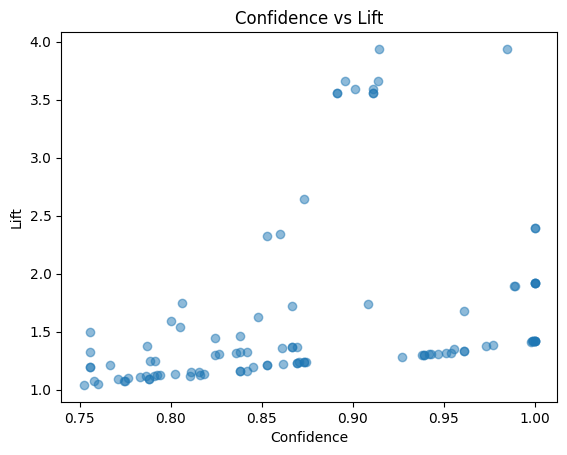

In [ ]:
import matplotlib.pyplot as plt

# Filtrar regras com alta confiança e alto lift
regras_filtradas = rules[(rules['confidence'] >= 0.75) & (rules['lift'] >= 1)]

# Visualizar a confiança vs. lift
plt.scatter(regras_filtradas['confidence'], regras_filtradas['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift')
plt.show()

In [ ]:
# Apenas uma verificação dos dados pelo excel. Desconsiderar!
from google.colab import files

data_filtrada.to_csv('semi.csv', index=False)
rules.to_csv('rules.csv', index=False)


files.download('semi.csv')
files.download('rules.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>